In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 120

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as skl

# make parent kaggle folder importable
import sys
import os
sys.path.append(os.path.abspath("../"))

import importlib
import graphs as g
import utils as u
import processing as p
import model as m
import selection as s

Using TensorFlow backend.


In [6]:
train_data = pd.read_csv('input/numerai_training_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108405 entries, 0 to 108404
Data columns (total 25 columns):
id           108405 non-null int64
era          108405 non-null object
data_type    108405 non-null object
feature1     108405 non-null float64
feature2     108405 non-null float64
feature3     108405 non-null float64
feature4     108405 non-null float64
feature5     108405 non-null float64
feature6     108405 non-null float64
feature7     108405 non-null float64
feature8     108405 non-null float64
feature9     108405 non-null float64
feature10    108405 non-null float64
feature11    108405 non-null float64
feature12    108405 non-null float64
feature13    108405 non-null float64
feature14    108405 non-null float64
feature15    108405 non-null float64
feature16    108405 non-null float64
feature17    108405 non-null float64
feature18    108405 non-null float64
feature19    108405 non-null float64
feature20    108405 non-null float64
feature21    108405 non-null float64
targe

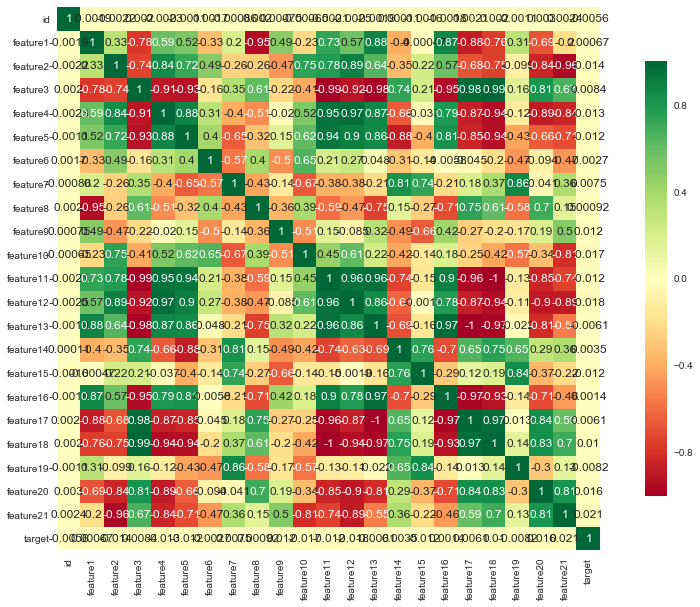

In [51]:
g.plot_correlation_map(train_data)

In [27]:
val_data = pd.read_csv('input/numerai_tournament_data.csv')
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45638 entries, 0 to 45637
Data columns (total 25 columns):
id           45638 non-null int64
era          45638 non-null object
data_type    45638 non-null object
feature1     45638 non-null float64
feature2     45638 non-null float64
feature3     45638 non-null float64
feature4     45638 non-null float64
feature5     45638 non-null float64
feature6     45638 non-null float64
feature7     45638 non-null float64
feature8     45638 non-null float64
feature9     45638 non-null float64
feature10    45638 non-null float64
feature11    45638 non-null float64
feature12    45638 non-null float64
feature13    45638 non-null float64
feature14    45638 non-null float64
feature15    45638 non-null float64
feature16    45638 non-null float64
feature17    45638 non-null float64
feature18    45638 non-null float64
feature19    45638 non-null float64
feature20    45638 non-null float64
feature21    45638 non-null float64
target       16686 non-null flo

# Feature selection

In [114]:
# features = [c for c in train_data.columns if c.startswith('feature')]
features = ['feature10', 'feature19', 'feature6', 'feature15', 'feature7']

In [115]:
X_train = np.array(train_data[features])
y_train = np.array(train_data.target)
u.log('X train', X_train.shape)
u.log('y train', y_train.shape)

X train * (108405, 5) 
y train * (108405,) 


In [116]:
X_val = np.array(val_data[val_data['data_type'] == 'validation'][features])
y_val = np.array(val_data[val_data['data_type'] == 'validation'].target)
u.log('X val', X_val.shape)
u.log('y val', y_val.shape)

X val * (16686, 5) 
y val * (16686,) 


In [117]:
X_train

array([[ 0.61347,  0.58776,  0.48424,  0.63455,  0.55901],
       [ 0.65801,  0.40764,  0.48828,  0.41754,  0.38715],
       [ 0.69926,  0.4708 ,  0.58975,  0.55986,  0.50705],
       ..., 
       [ 0.47847,  0.58654,  0.42074,  0.56678,  0.62425],
       [ 0.46715,  0.57817,  0.51531,  0.57645,  0.64991],
       [ 0.51902,  0.60305,  0.51279,  0.56309,  0.56191]])

# Keras

In [118]:
importlib.reload(m)
from keras import optimizers as o
from sklearn.utils import class_weight

cw = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

model = m.keras_single_classification(X_train.shape[1])
model.compile(loss='binary_crossentropy', optimizer=o.RMSprop(lr=1e-2), metrics=['accuracy'], class_weight=cw)
history = model.fit(X_train, y_train, epochs=10, batch_size=1000)

result = model.evaluate(X_val, y_val, verbose=1)
print('')
u.log(model.metrics_names, result)

# plt.figure(figsize=(12,8))
# g.plot_loss(history)
# g.plot_accuracy(history)

/Users/icostan/Work/kaggle/ENV/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/10
108405/108405 [==============================] - 1s - loss: 0.6934 - acc: 0.5016      
Epoch 2/10
108405/108405 [==============================] - 0s - loss: 0.6932 - acc: 0.5005     

# XGB

In [ ]:
import xgboost as xgb
import operator

xgbc = xgb.XGBClassifier(learning_rate=0.01, n_estimators=50, silent=False)
xgbc.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='logloss', verbose=True)

xgb.plot_importance(xgbc)